## imports:

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


from sklearn.svm import SVR
#from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb

#print ('sk learn version:',sklearn.__version__)  #0.21.2

## explore data:

In [43]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
print(train.columns)
print(test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
#train.info()
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#correlation - heatmap
plt.subplots(figsize=(150,150))
sns.heatmap(train)

## preprocessing- cat to num, process Na

In [44]:
#train.head()
#train.info()
#oBeDropped=['Id',''
cols=[]
'''
for x in train.columns:
    if train[x].dtype != 'object':
        cols.append(x)
print (cols)
df_train=train[cols]        
df_train.drop(['Id'],axis=1,inplace=True)
df_train.columns
'''
def get_all_cat_cols(df):
    cols=[]
    for col in df.columns:
        if df[col].dtype == 'object':
            cols.append(col)
    return cols
def get_cat_cols(df):
    cat_cols=[]
    for col in df.columns:
        if df[col].dtype == 'object' and len(df[col].unique())<10:
            cat_cols.append(col)
    return cat_cols
def drop_all_categorical(df,cols):
    df.drop(cols,axis=1,inplace=True)
def convert_cat_to_num(df,cols):
    for col in cols:
       df=pd.concat([df,pd.get_dummies(df[col],drop_first=True)],axis=1) 
    return df  
    
def pre_process(df,cat_cols,cols):
    #get list of categorical columns


    #convert cat to num
    print('####',df.shape)
    df=convert_cat_to_num(df,cat_cols)
    print('####',df.shape)
    #drop all categorical columns
    drop_all_categorical(df,cols)
    print(len(df.columns))
    df.drop(['Id'],axis=1,inplace=True)
    #print(f"cat_cols {cat_cols}" )
    return df
#dealing with NAN

#for column in train.columns:
#    train[column].fillna(train[column].mode()[0], inplace=True)
   
    
y=train['SalePrice']
print(y[0])
train.drop(['SalePrice'],axis=1,inplace=True)
train.info()
    
cat_cols=get_cat_cols(train)
all_cat_cols=get_all_cat_cols(train)
print(len(train.columns))  

print ('train size:',train.shape)
train=pre_process(train,cat_cols,all_cat_cols)
print ('train size_:',train.shape)

colsUsed=train.columns





208500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      146

In [45]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C87EE4E88>,
      dtype=object)

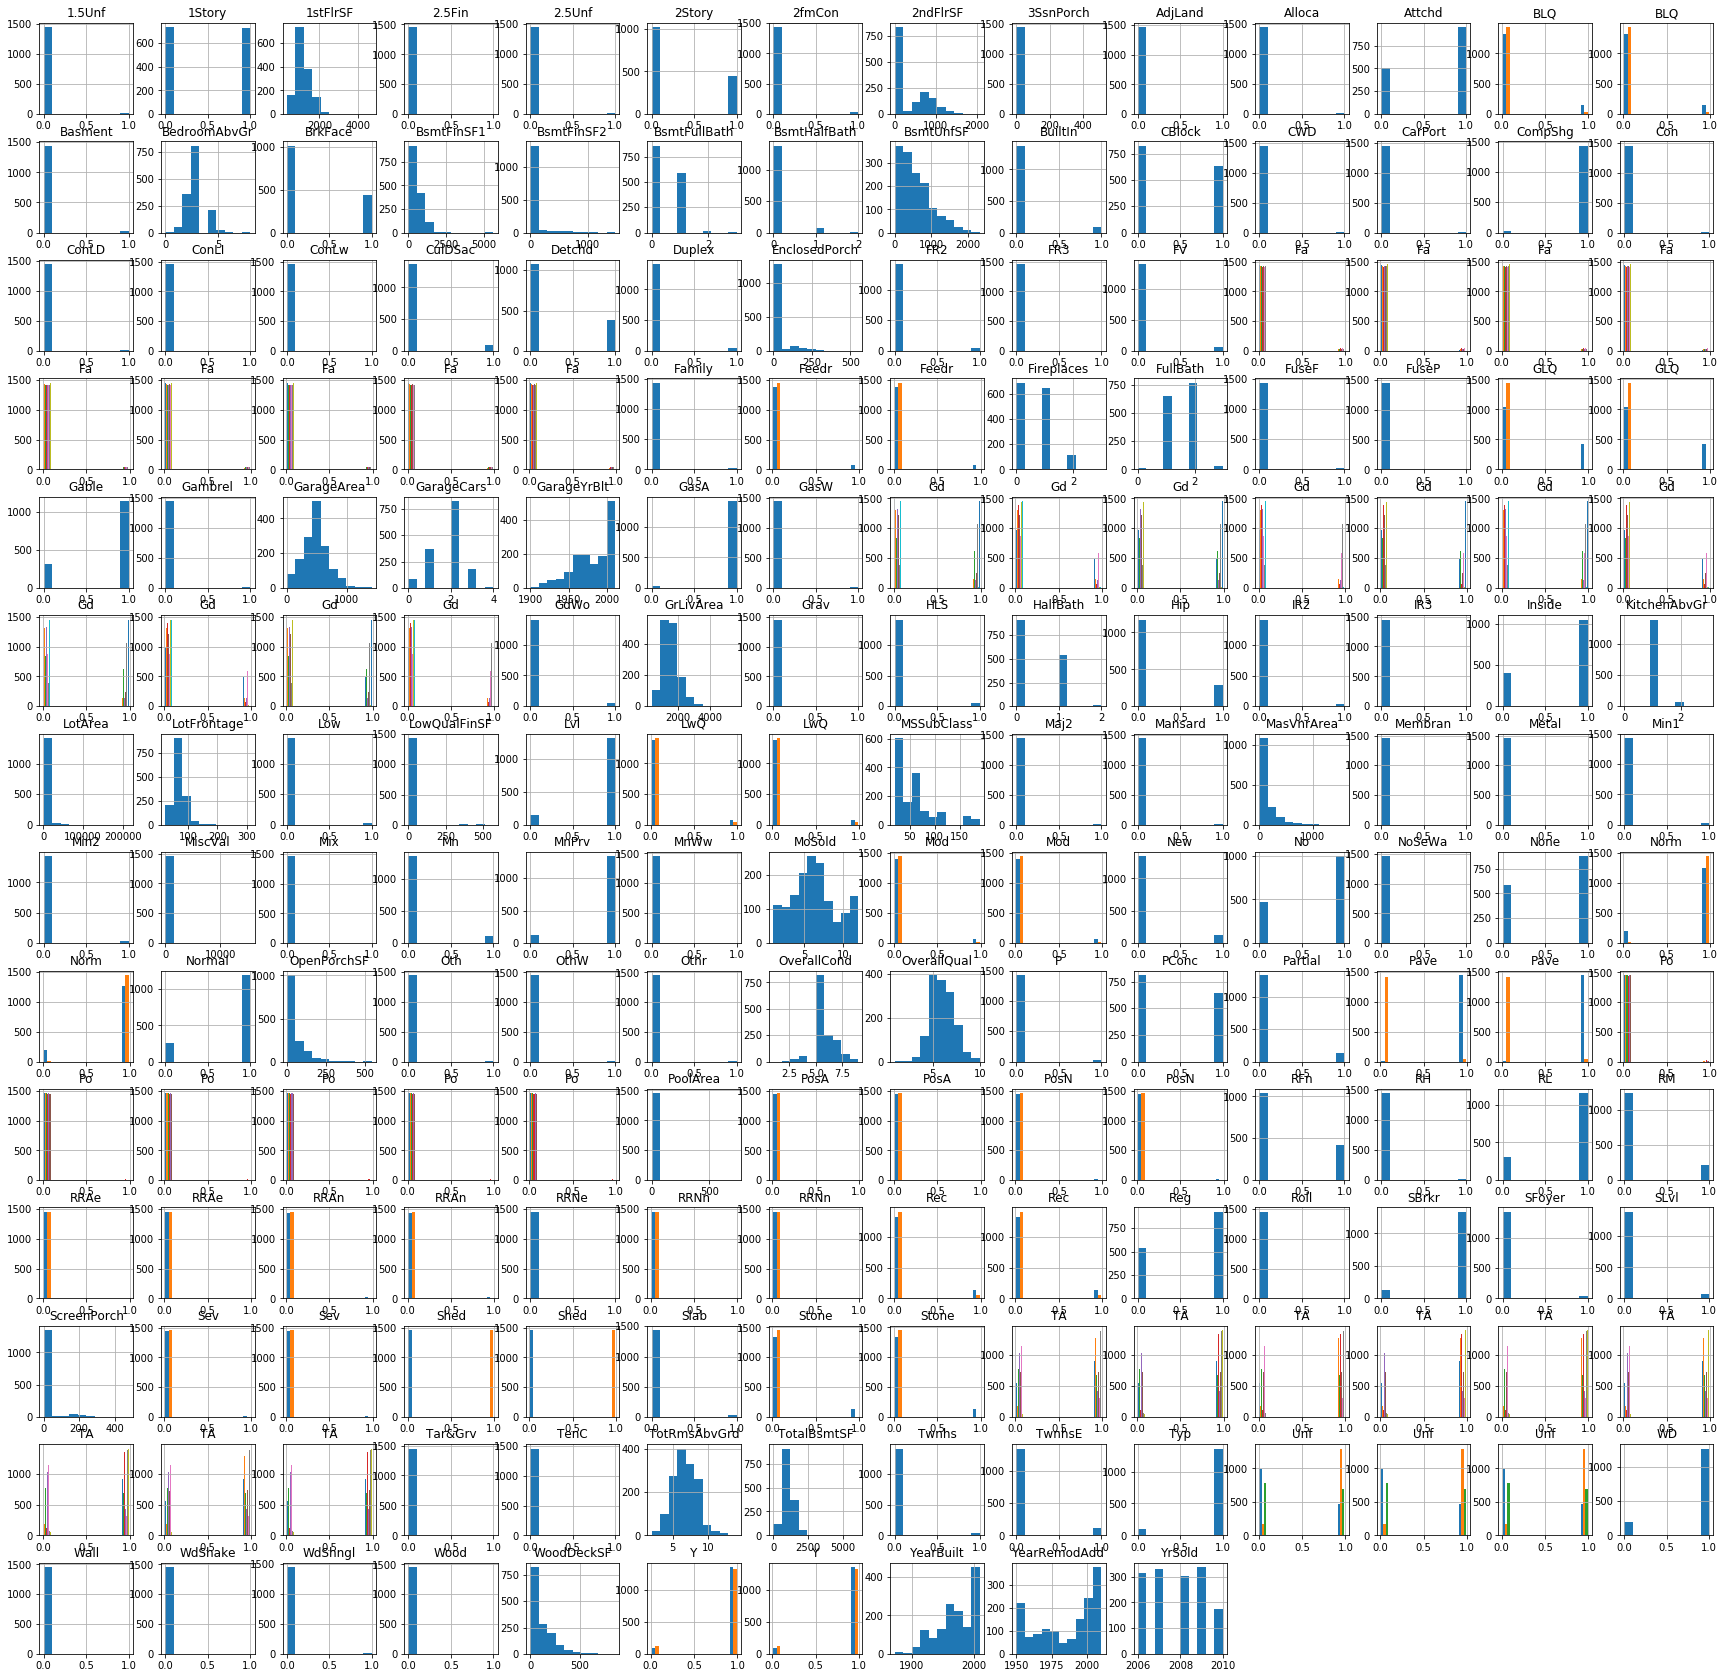

In [15]:
#histogram
train.hist(figsize=(30,30))

In [46]:

##Scaling- standardization
def scale_x(x):
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    return x
    
def scale_y(y):
    print(y[0])
    shape=y.shape
    scaler=StandardScaler()
    y=scaler.fit_transform(y.values.reshape(-1,1))
    y.reshape(shape)
    return y

print(type(y))
train=scale_x(train)
y=scale_y(y)
#print (y[1])


<class 'pandas.core.series.Series'>
208500


##  models:

In [48]:
#x_train,y_train,x_test,y_test=train_test_split(train,y,test_size=0.2)
#print ( x_train.shape," ",y_train.shape)

models= []
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

xg = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

#models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
#models.append(('SVM',SVC())) #classification
#models.append(('Random Forest',RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)) )
#models.append(('SVM_lin',svr_lin))
#models.append(('SVM_rbf',svr_rbf))
#models.append(('SVM_poly',svr_poly))
#models.append(('xgboost',xg))

results=[]
n_splits=int(100/10) # 10 percent test data
#print (n_splits)

for name,model in models:
    
    kfold=model_selection.KFold(n_splits=n_splits)
    #scoring='accuracy'
    cv_result=model_selection.cross_val_score(model,train,y.ravel(),cv=kfold,scoring='r2') #accuracy is for classification 
    results.append((name,r2))
    r2=np.mean(cv_result)
    print (f"model: {name} r2 {r2}")
    
for name,error in sorted(results,key=lambda x: x[1]):  
    print (f'model: {name} r2:{error}')
    
'''
model: Random Forest r2 0.8361734466740234
model: SVM_lin r2 0.7913805620709785
model: SVM_rbf r2 0.610882521744382
model: SVM_poly r2 0.5124844356292999
model: xgboost r2 0.8759133836463844
'''


              

'\nmodel: Random Forest r2 0.8361734466740234\nmodel: SVM_lin r2 0.7913805620709785\nmodel: SVM_rbf r2 0.610882521744382\nmodel: SVM_poly r2 0.5124844356292999\nmodel: xgboost r2 0.8759133836463844\n'

In [49]:
print(train.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(train,y,test_size=0.2)

print(x_train.shape)
print(y_train.shape)
xg.fit(x_train,y_train)
print(xg.score(x_test,y_test))

#0.8545926018476493
'''
(1460, 36)
(1460, 1)
(1168, 36)
(1168, 1)
[17:37:58] '''

(1460, 192)
(1460, 1)
(1168, 192)
(1168, 1)
[21:16:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9145890970844005


'\n(1460, 36)\n(1460, 1)\n(1168, 36)\n(1168, 1)\n[17:37:58] '

In [50]:
#run on kaggle test data:
test=pd.read_csv('data/test.csv')
print('test shape before:',test.shape)
id=test['Id']
print(test.shape)
print(test.columns)
#all_cat_cols=get_all_cat_cols(train)
test=pre_process(test,cat_cols,all_cat_cols)
test=test[colsUsed]
print(test.shape)
test=scale_x(test)
print('test shape after:',test.shape)
house_price=xg.predict(test)

house_price=scaler.inverse_transform(house_price)


df=pd.DataFrame({'Id':id,'SalePrice':house_price})
df.to_csv('data/house_price_ans.csv',index=False)


'''
test shape before: (1459, 80)
(1459, 80)
37
(1459, 36)
(1459, 36)
(1459, 36)
test shape after: (1459, 36)'''

test shape before: (1459, 80)
(1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'Gara

KeyError: "['TenC', 'Membran', 'Roll', 'NoSeWa', 'Mix', '2.5Fin', 'CompShg', 'OthW', 'Metal', 'GasA'] not in index"